In [442]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing Dataset (CSV File)

dataset = pd.read_csv('Dataset/Sales_Data.csv', encoding = 'unicode_escape')

In [444]:
dataset.shape

(11251, 15)

In [445]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [446]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [447]:
# Drop Blank/Unnecessary Columns
dataset.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [448]:
# Checking Null Values
dataset.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [449]:
# Droping Null Values
dataset.dropna(inplace = True)

In [450]:
# Change Column Datatype
dataset['Amount'] = dataset['Amount'].astype('int')

In [451]:
dataset['Amount'].dtypes

dtype('int64')

In [452]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [453]:
dataset.rename(columns = {'Age Group':'Age_Group'}, inplace = True)

In [454]:
#dataset.describe
#dataset.describe()
dataset[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

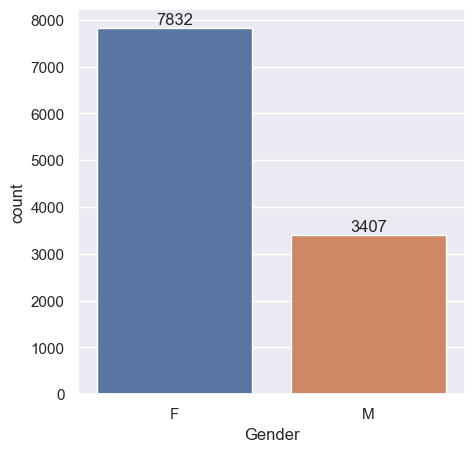

In [455]:
# plotting a bar chart for Gender and it's count

sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.countplot(data = dataset, x = 'Gender', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

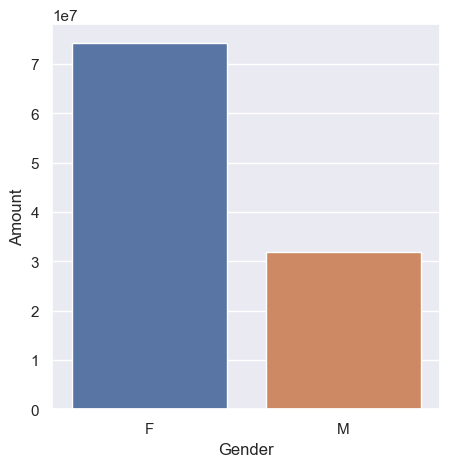

In [456]:
# Plotting a bar chart for gender vs total amount

gen_sales = dataset.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(data = gen_sales, x = 'Gender', y = 'Amount', hue = 'Gender')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

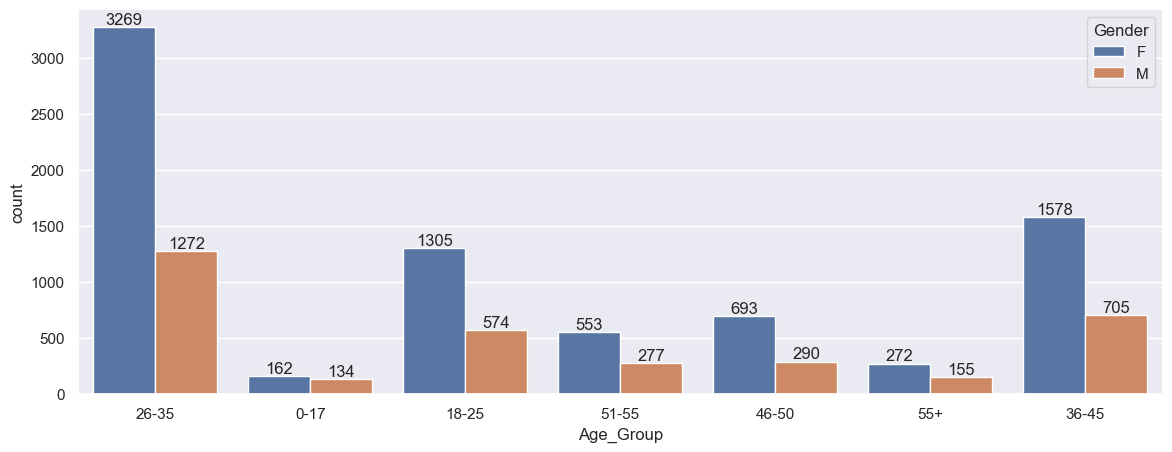

In [457]:
sns.set(rc={'figure.figsize':(14,5)})
ax = sns.countplot(data = dataset, x = 'Age_Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

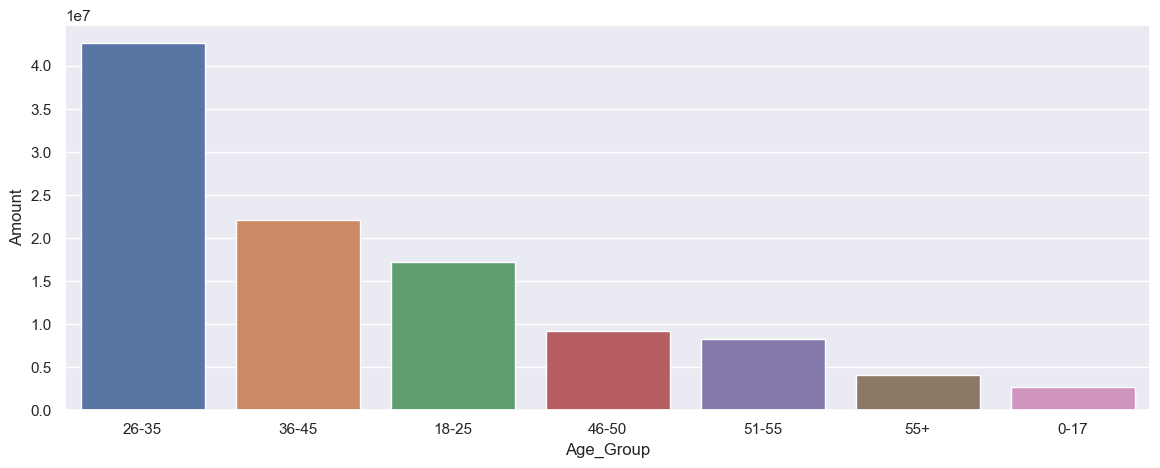

In [458]:
# Total Amount vs Age Group

age_sales = dataset.groupby(['Age_Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(data = age_sales, x = 'Age_Group', y = 'Amount', hue = 'Age_Group')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

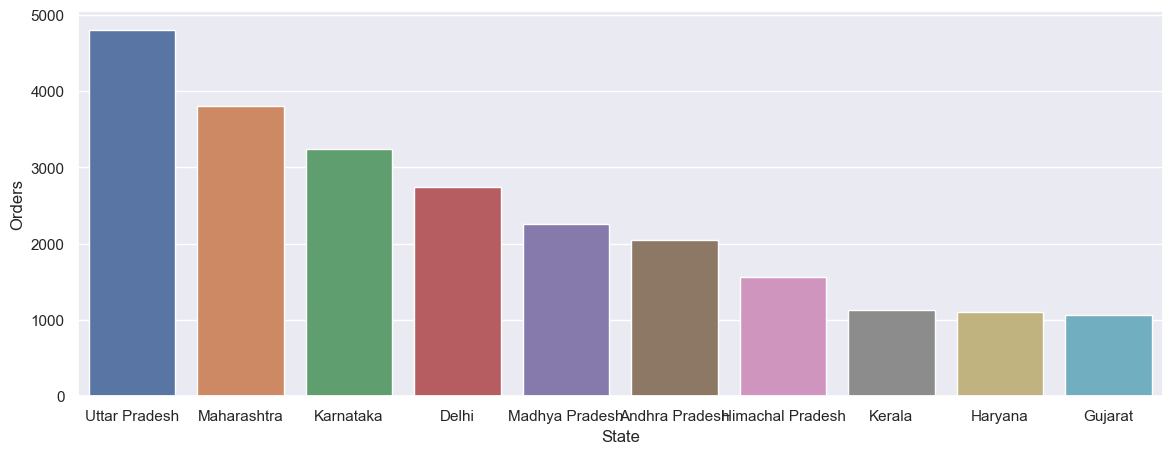

In [459]:
# Total number of orders from top 10 states

state_sales = dataset.groupby('State', as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(data = state_sales, x = 'State', y = 'Orders', hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

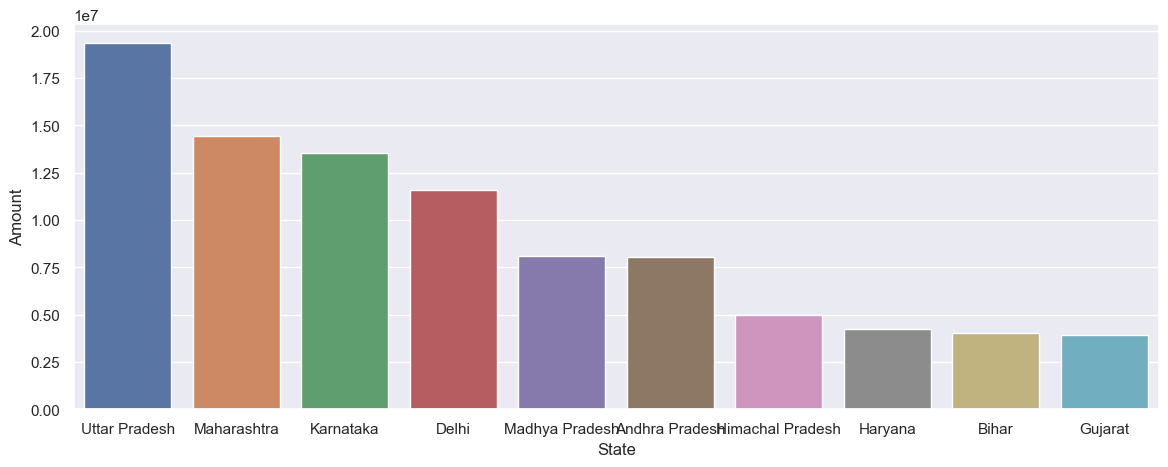

In [460]:
# Total amount/sales from top 10 states

state_sales = dataset.groupby('State', as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(data = state_sales, x = 'State', y = 'Amount', hue = 'State')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

### Marital Status

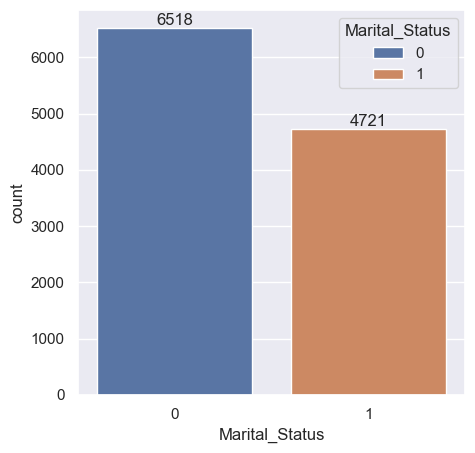

In [461]:
sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.countplot(data = dataset, x = 'Marital_Status', hue = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

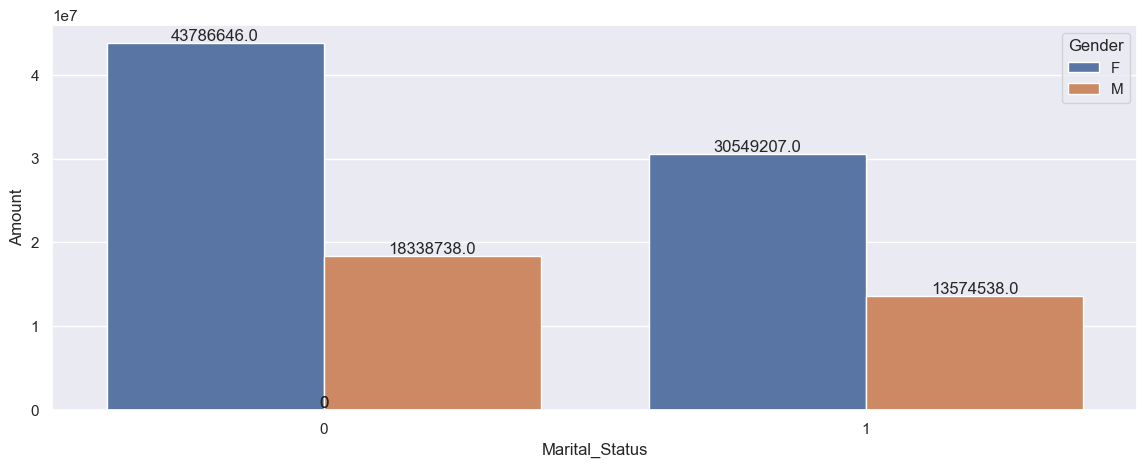

In [462]:
sales = dataset.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sales

sns.set(rc = {'figure.figsize':(14,5)})
# Create the bar plot
bar_plot = sns.barplot(data= sales, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

# Adding labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height()),  # Format the label
                      (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
                      ha='center', va='center',      # Center alignment
                      xytext=(0, 5),                 # Offset the text slightly above the bar
                      textcoords='offset points')


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

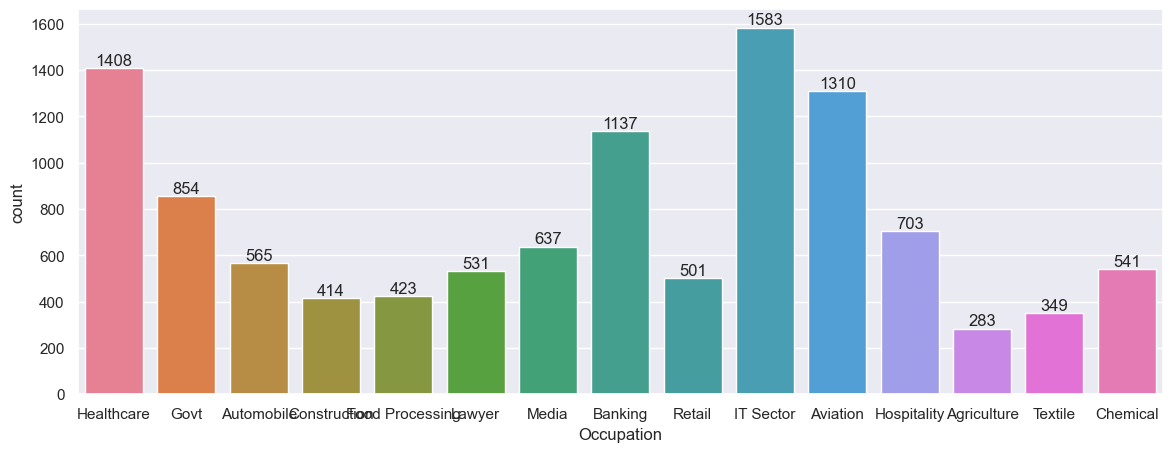

In [463]:
sns.set(rc = {'figure.figsize':(14,5)})

ax = sns.countplot(data = dataset, x = 'Occupation', hue = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

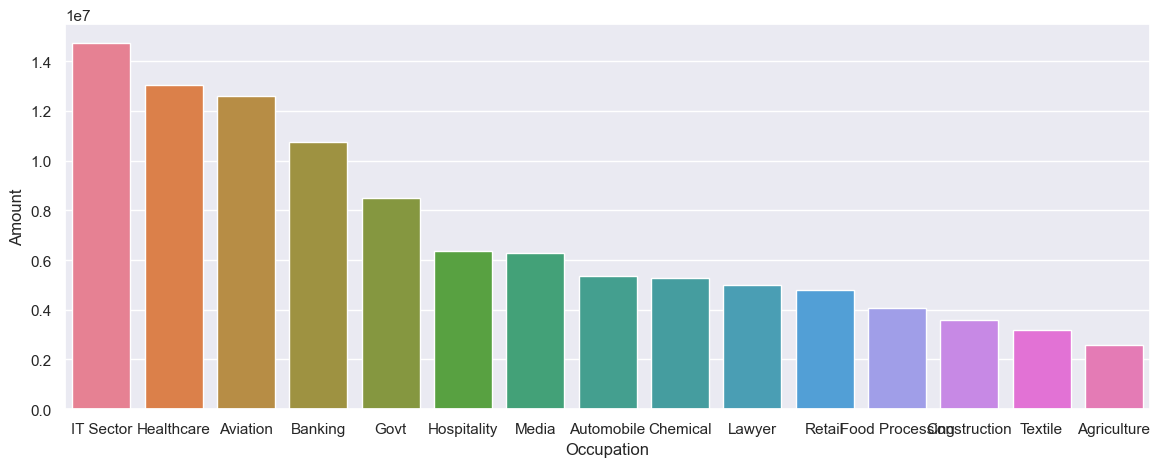

In [464]:
occu_sales = dataset.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize':(14,5)})
sns.barplot(data = occu_sales, x = 'Occupation', y = 'Amount', hue = 'Occupation')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

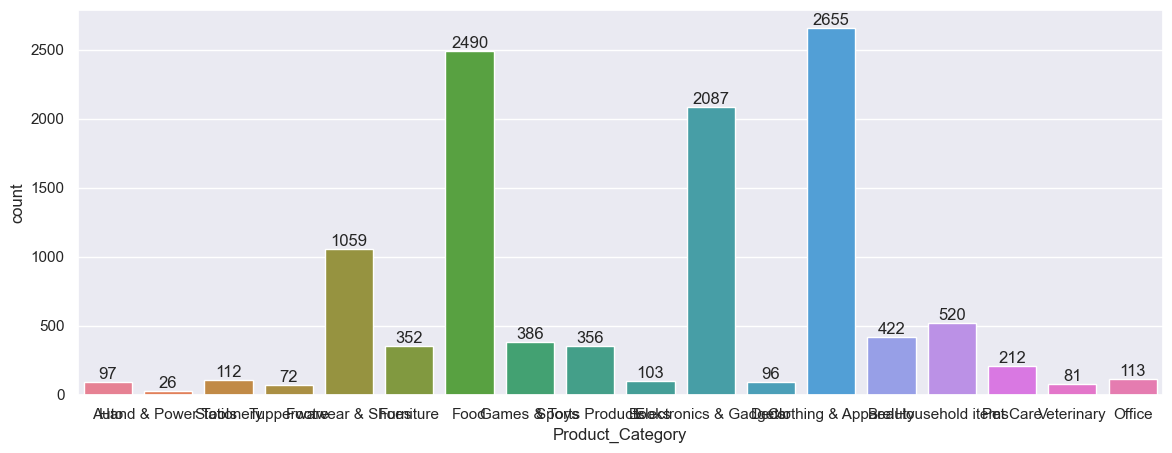

In [465]:
sns.set(rc = {'figure.figsize':(14,5)})
ax = sns.countplot(data = dataset, x = 'Product_Category', hue = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

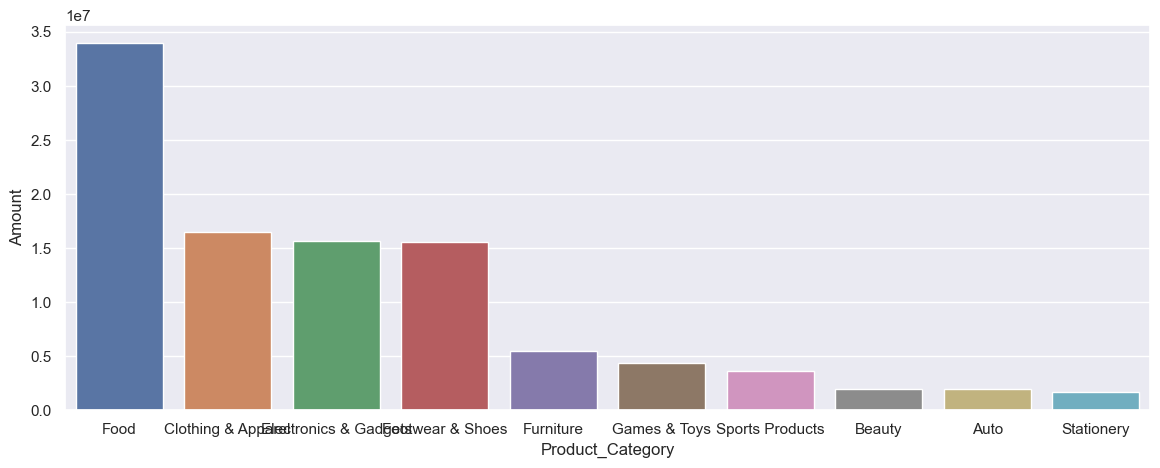

In [466]:
cate_sales = dataset.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc = {'figure.figsize':(14,5)})
sns.barplot(data = cate_sales, x = 'Product_Category',y= 'Amount', hue = 'Product_Category')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

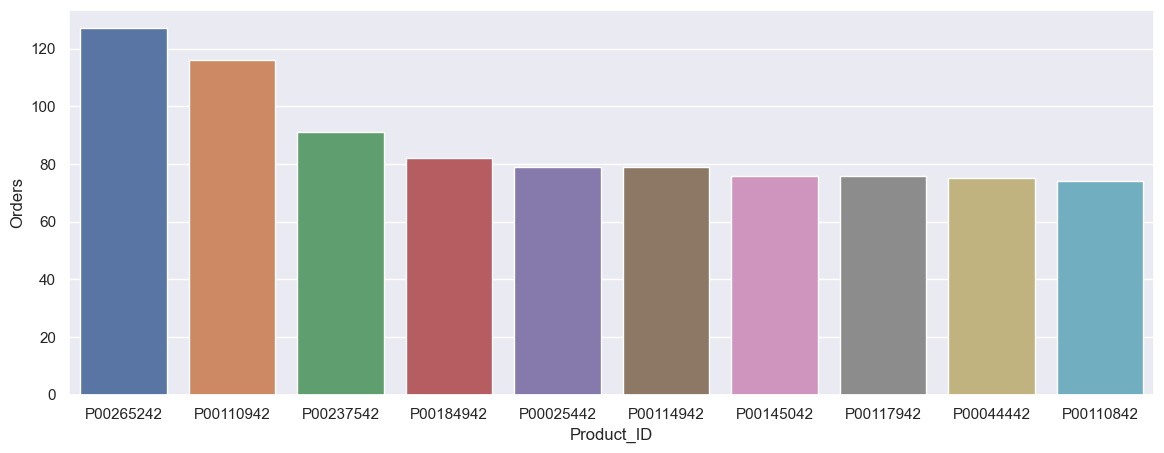

In [467]:
top_sales = dataset.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc = {'figure.figsize':(14,5)})
sns.barplot(data = top_sales, x = 'Product_ID',y= 'Orders', hue = 'Product_ID')

<Axes: xlabel='Product_ID'>

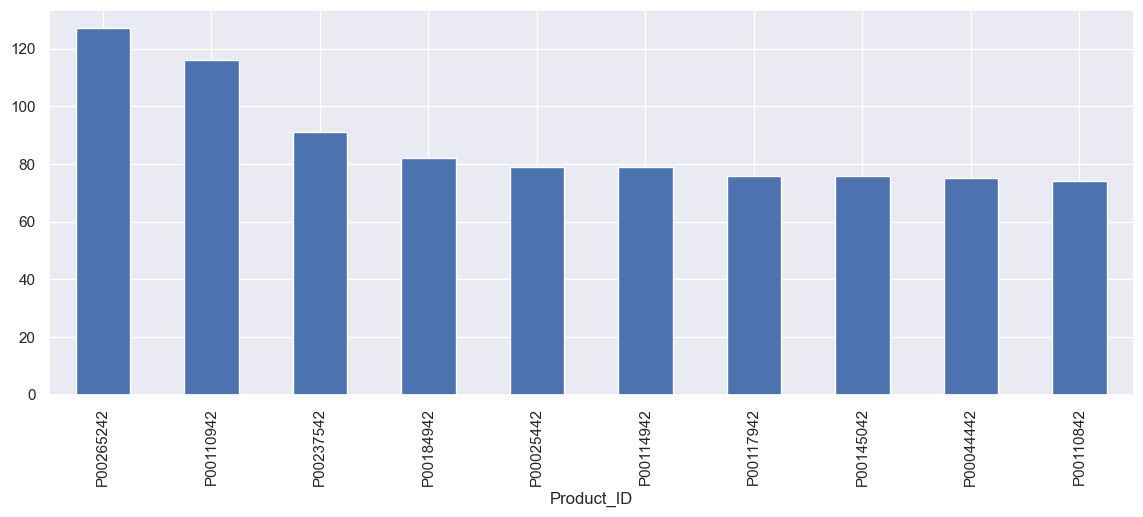

In [468]:
# Top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(14,5))
dataset.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:
Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.